# Bike Sharing Analysis with Ford GoBike Data
## Huizi Shao

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of bike riding market. The bike riding usage count related to the gender, user type, time and duration of riding.


## Dataset Overview

> The data consisted of 20 features and 2805001 data in the end after data wrangling. The attributes included the infomation of the member users and for the general bike riding (id, station, duration, etc). The duplicated and ambigulous data points (columns) are removed for the analyzing.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data_1.csv')
df_copy = pd.read_csv('df_copy.csv')
df_copy

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age_member,month_start,start_time_month
0,598.0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,1988.0,Male,No,9.966667,32.0,2,18-02
1,943.0,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,1987.0,Male,No,15.716667,33.0,2,18-02
2,885.0,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,1976.0,Female,Yes,14.750000,44.0,2,18-02
3,921.0,2018-02-28 23:14:19.170,2018-02-28 23:29:40.437,312.0,San Jose Diridon Station,37.329732,-121.901782,288.0,Mission St at 1st St,37.350964,-121.902016,2656.0,Customer,1997.0,Male,No,15.350000,23.0,2,18-02
4,285.0,2018-02-28 23:21:19.631,2018-02-28 23:26:05.405,198.0,Snow Park,37.807813,-122.264496,196.0,Grand Ave at Perkins St,37.808894,-122.256460,144.0,Subscriber,1990.0,Female,No,4.750000,30.0,2,18-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804996,480.0,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832.0,Subscriber,1996.0,Male,No,8.000000,24.0,2,19-02
2804997,313.0,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960.0,Subscriber,1984.0,Male,No,5.216667,36.0,2,19-02
2804998,141.0,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824.0,Subscriber,1990.0,Male,Yes,2.350000,30.0,2,19-02
2804999,139.0,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095.0,Subscriber,1988.0,Male,No,2.316667,32.0,2,19-02


## (Visualization 1)

> Distribution of the Duration in min

> Duration (min) has the distribution like normal when plotted on a log-scale, with mean around 10 min. In general, people have short rides


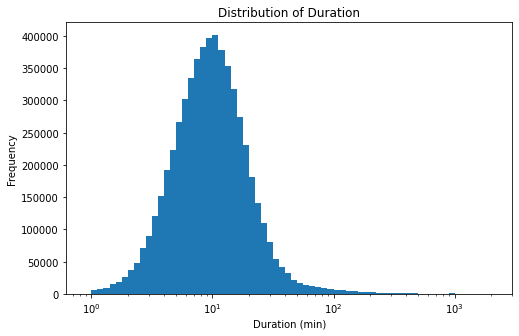

In [3]:
df['duration_min'] = df['duration_sec'] / 60

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xlim(0,3000)
plt.xticks([1 , 10, 100, 1000])
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show();

## (Visualization 2)

> Distribution of the age groups pf members

> We find that most of the member users are around 30 to 40 years old, Then 20-30 years old

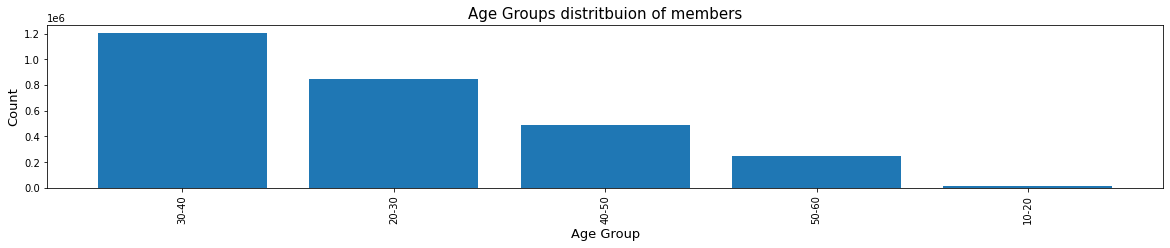

In [4]:
age_idx = df_copy.age_member.value_counts().index
age_count = df_copy.age_member.value_counts().values

age_list = df_copy.age_member.value_counts().index

from collections import defaultdict
ages = defaultdict(int)

for i in range(len(age_idx)):
    if age_idx[i] > 50:
        ages['50-60'] += age_count[i]
    elif age_idx[i] > 40:
        ages['40-50'] += age_count[i]
    elif age_idx[i] > 30:
        ages['30-40'] += age_count[i]
    elif age_idx[i] > 20:
        ages['20-30'] += age_count[i]
    elif age_idx[i] > 10:
        ages['10-20'] += age_count[i]     


plt.figure(figsize=(20, 3))

keys = ages.keys()
values = ages.values()
plt.bar(keys, values)
plt.xticks(rotation = 90)
plt.xlabel('Age Group',fontsize =13)
plt.ylabel('Count',fontsize =13)
plt.title('Age Groups distritbuion of members', fontsize =15);

## (Visualization 3)

> Market Growing based on month for different user type

>  We can see the Bike sharing market growing quickly from 17-06 to 19-04. The Suscribers grew really fast in general, customers stay the similat fluctuation and interestingly, for suscribers, there is a big drop between 18-11 and 18-12, and spikes afterwards, it might need further investigation


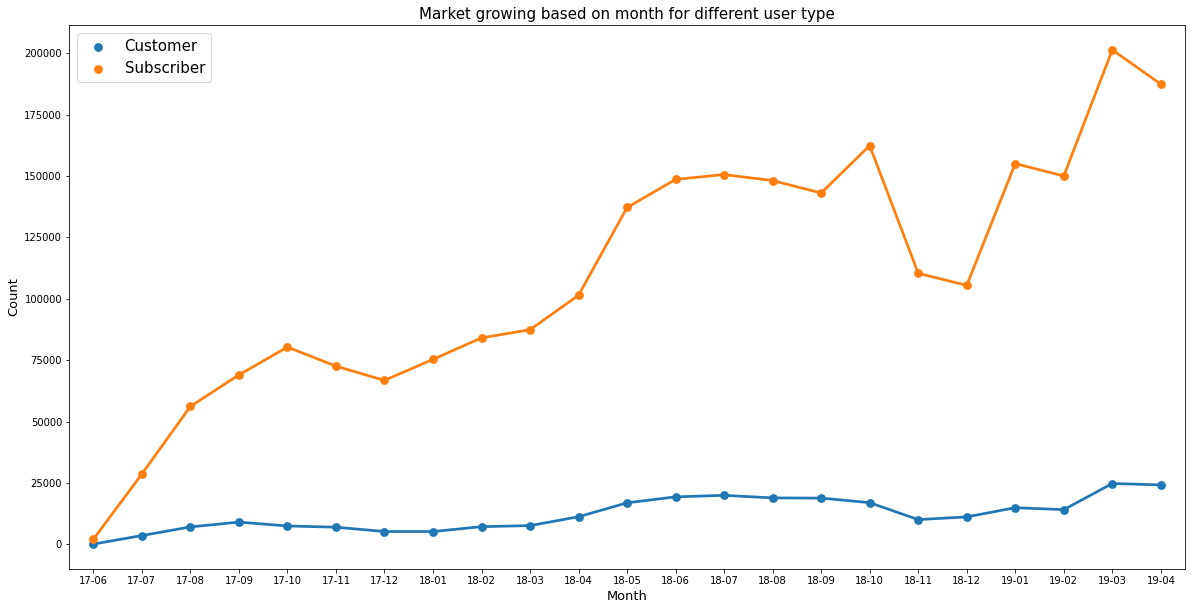

In [5]:
month_user_type = df_copy.groupby(['start_time_month','user_type']).size().reset_index()

plt.figure(figsize =(20, 10))

sb.pointplot(data = month_user_type, x='start_time_month', y=0, hue ='user_type', scale =1)
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Market growing based on month for different user type',fontsize = 15)
plt.legend(prop={'size': 15} ,loc='upper left');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!